# 2D Gradient Descent Project

  

http://www.sfu.ca/~ssurjano/camel6.html

Six-Hump Camel Fucntion

$$f(x) = (4-2.1x_1^2 +\frac{x_1^4}{3})x_1^2 +x_1x_2 + (-4+4x_2^2)x_2^2$$




In [0]:
# import the necessary library
import numpy as np
import math
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d
from sympy import symbols, diff
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [0]:
# choosing function(drop wave equation)
def six_hump(x1,x2):
    #func_loss = (x1+2*x2-7)**2+(2*x1+x2-5)**2
    func_loss =(4-2.1*x1**2+x1**4/3)*x1**2 + x1*x2+(-4+4*x2**2)*x2**2
    return func_loss
# Calculate the gradient(partial derivative) of the function
def grad(x1_init,x2_init):
    x1,x2 = symbols('x1 x2',real=True)
    #loss = x1**2+x2**2
    loss = (4-2.1*x1**2+x1**4/3)*x1**2 + x1*x2+(-4+4*x2**2)*x2**2
    d1 = diff(loss,x1)
    d2 = diff(loss,x2)
    g_x1 = d1.evalf(subs={x1: x1_init,x2: x2_init})
    g_x2 = d2.evalf(subs={x1: x1_init,x2: x2_init})
    g = np.array([g_x1,g_x2], dtype=np.float64)
    return g

In [0]:
#Checking whether the function is correctly input
x1 = 0.0898
x2 = -0.7126
g = grad(x1,x2)

print(six_hump(x1,x2))
print(np.sqrt(g.dot(g)))

-1.0316284229280819
0.0009224226016139799


In [0]:
#ref: https://github.com/alanchalk/aml_2019_gd
class grad_2d:
    def __init__(self, fn_loss, fn_grad):
        self.fn_loss = fn_loss
        self.fn_grad = fn_grad

    #function for plain vanilla gradient descent
    def vanilla(self, x1_init, x2_init, n_iter, eta, tol):
        self.n_iter = n_iter
        self.eta = eta
        self.tol = tol
        var_x = [x1_init,x2_init]
        
        loss_path = []
        x_path = np.zeros([n_iter+1,2])
        
        x_path[0,:] = var_x
        loss_this = self.fn_loss(var_x[0],var_x[1])
        loss_path.append(loss_this)
        
        g = self.fn_grad(var_x[0],var_x[1])

        for i in range(n_iter):
            if np.sqrt(g.dot(g)) < tol: 
                break
            g = self.fn_grad(var_x[0],var_x[1])
            var_x += -eta*g
            x_path[i+1,:] = var_x
            
            loss_this = self.fn_loss(var_x[0],var_x[1])
            loss_path.append(loss_this)
            
        self.loss_path = loss_path
        self.x_path = x_path[0:i+1]
        self.loss_fn_min = loss_this
        self.x_min = var_x
        self.n_iter = i

    # function for gradient descent with momentum + learning rate decay
    def momentum(self, x1_init, x2_init, n_iter, eta, tol, alpha):
        self.n_iter = n_iter
        self.eta = eta
        self.tol = tol
        self.alpha = alpha
        var_x = [x1_init,x2_init]
        
        loss_path = []
        x_path = np.zeros([n_iter+1,2])
        
        x_path[0,:] = var_x
        loss_this = self.fn_loss(var_x[0],var_x[1])
        loss_path.append(loss_this)
       
        nu = 0
        #decay parameters
        drop = 0.25
        epochs_drop = 10.0
        epoch = 20

        for i in range(n_iter):
            g = self.fn_grad(var_x[0],var_x[1])
            if np.sqrt(g.dot(g)) < tol: 
                break
            lrate = eta * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
            nu = alpha * nu + lrate * g
            var_x += -nu
            
            x_path[i+1,:] = var_x
            loss_this = self.fn_loss(var_x[0],var_x[1])
            loss_path.append(loss_this)

        
        self.loss_path = loss_path
        self.x_path = x_path[0:i+1]
        self.loss_fn_min = loss_this
        self.x_min = var_x
        self.n_iter = i

    # function for gd with nesterov
    def nag(self, x1_init, x2_init, n_iter, eta, tol, alpha):
        self.n_iter = n_iter
        self.eta = eta
        self.tol = tol
        self.alpha = alpha
        var_x = [x1_init,x2_init]

        loss_path = []
        x_path = np.zeros([n_iter+1,2])

        x_path[0,:] = var_x
        loss_this = self.fn_loss(var_x[0],var_x[1])
        loss_path.append(loss_this)
        #g = self.fn_grad(var_x[0],var_x[1])

        nu = np.array([0,0])
        for i in range(n_iter):
            # i starts from 0 so add 1
            # The formula for mu was mentioned by David Barber UCL as being Nesterovs suggestion
            mu = 1 - 3 / (i + 1 + 5) 
            g = self.fn_grad(var_x[0]-mu*nu[0],var_x[1]-mu*nu[1])
            drop = 0.25
            epochs_drop = 10.0
            epoch = 20
            if np.sqrt(g.dot(g)) < tol: 
                break
            lrate = eta * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
            nu = alpha * nu + lrate * g
            var_x += -nu
            
            x_path[i+1,:] = var_x
            loss_this = self.fn_loss(var_x[0],var_x[1])
            loss_path.append(loss_this)
            

        self.loss_path = loss_path
        self.x_path = x_path[0:i+1]
        self.loss_fn_min = loss_this
        self.x_min = var_x
        self.n_iter = i

# loss function  
def fn_loss(x1,x2):
    #loss = x1**2+x2**2
    loss = (4-2.1*x1**2+x1**4/3)*x1**2 + x1*x2+(-4+4*x2**2)*x2**2
    return loss
# This part of fucntion I got it from discussion with my friend with their permission
# I did this by hand at first. credit: Adam 
# function for calculating gradient
def fn_grad(x1_init,x2_init):
    x1,x2 = symbols('x1 x2',real=True)
    #loss = x1**2+x2**2
    loss = (4-2.1*x1**2+x1**4/3)*x1**2 + x1*x2+(-4+4*x2**2)*x2**2
    d1 = diff(loss,x1)
    d2 = diff(loss,x2)
    g_x1 = d1.evalf(subs={x1: x1_init,x2: x2_init})
    g_x2 = d2.evalf(subs={x1: x1_init,x2: x2_init})
    g = np.array([g_x1,g_x2], dtype=np.float64)
    return g
  
#ref: https://matplotlib.org/gallery/mplot3d/surface3d.html
#function for plotting loss function and path of gd
def plot(path):
    fig = plt.figure()
    ax = plt.gca(projection='3d')
    

    x1 = np.arange(-3,3,0.01)
    x2 = np.arange(-2,2,0.01)
    
    X, Y = np.meshgrid(x1,x2)
    zs = np.array(fn_loss(np.ravel(X), np.ravel(Y)))
    zs.shape
    Z = zs.reshape(X.shape)
    Z = fn_loss(X,Y)
    
    #Plot the surface of the function 
    x = path[:,0]
    y = path[:,1]
    #z = zs.reshape(X.shape)
    z = fn_loss(x,y)
    
    surf = ax.plot_surface(X, Y, Z,cmap =cm.coolwarm)
    cset = ax.contour(X, Y, Z, zdir='z', offset=-100)
    
    ax.plot3D(x,y,z,'firebrick',linewidth = 2)
    #cset1 = ax.countour(x,y,z,zdir = 'z',offset = -100)

    ax.set_xlabel('X1Label')
    ax.set_ylabel('X2 Label')
    ax.set_zlabel('Z Label')
    ax.set_zlim(-50,200)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    plt.show()

def converge(x_path,func_path):
    fig = plt.figure()

    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot(1,1,1)
    x  = x_path[:,0]
    y = func_path
    
    ax.set_xlabel('function path on 1d',fontsize=20)
    ax.set_ylabel('loss path ',fontsize=20)
    ax.plot(x,y)
    plt.show()
    

**Step size vs number of iteration**

Step size(learning rate) is the parameter that govern the speed of convergence. The higher the value of step size, the faster the function is going to the local minimum. However, if the step size is too big, the function might diverge.

In [0]:
# initalise the class
solver = grad_2d(fn_loss=fn_loss, fn_grad=fn_grad)

The global minimum (vanilla) is:  [ 0.08984201 -0.7126564 ]
Number of steps taken to reach global minimum 99


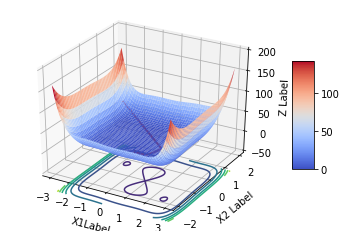

<Figure size 432x288 with 0 Axes>

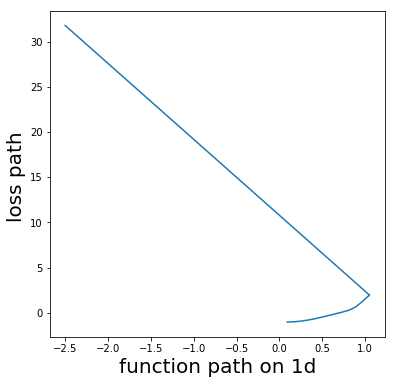

In [0]:
# plain vanilla gradient descent & input parameters 
solver.vanilla(x1_init = -2.5, x2_init=1.5, n_iter = 25000,eta = 0.043, tol = 1e-15)
vanilla_path = solver.x_path
vanilla_min = solver.x_min.astype(np.double)
vanilla_loss = solver.loss_path

print('The global minimum (vanilla) is: ', vanilla_min)
print('Number of steps taken to reach global minimum',solver.n_iter)
plot(vanilla_path)
converge(vanilla_path,vanilla_loss)


It's very difficult to plot the relationship between the learning rate and number of iterations for this function. If learning rate is a bit high the gradient is going to explode(with constant gradient implementing in plain vanilla for this function.) I couldn't even find the ziggzag behaviour of this function maybe because of it flat nature on the bottom. The value explode if the starting poing is on the very steep part.

# Momentum and Nesterov

  Problem of Gradient Descent
  

1.   Slow when gradient is constantly small
2.   Follow wrong path in Noisy gradient

Particulary for this function if the learning rate is too high the magnitude of gradient is going to explode.

Momentum:
α is much bigger than η, the accumulated previous gradients will be dominant in the update rule so the gradient at the iteration will not change the current direction quickly. This is good in the condition when the gradient is noisy because the gradient will stay in the true direction for good. In the other hand, if α is much smaller than η, the accumulated previous gradients can act as a smoothing factor for the gradient.

The point which generates the minimum (momentum) is:  [ 0.08984201 -0.7126564 ]
Number of steps taken to reach global minimum 689


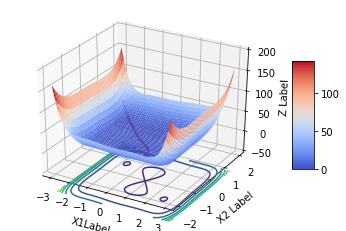

<Figure size 432x288 with 0 Axes>

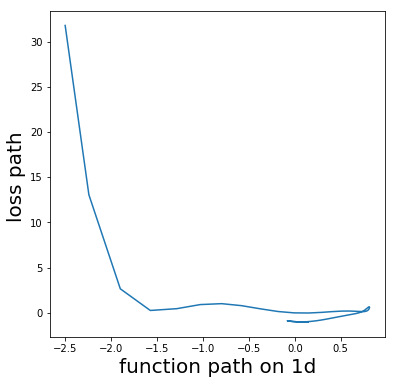

In [0]:
# gradient descent with momentum & input parameters
solver.momentum(x1_init = -2.5, x2_init=1.5, n_iter = 25000,
                eta = 0.05, tol = 1e-15, alpha = .9)
momentum_path = solver.x_path
momentum_min = solver.x_min.astype(np.double)
momentum_loss = solver.loss_path

print('The point which generates the minimum (momentum) is: ', momentum_min)
print('Number of steps taken to reach global minimum',solver.n_iter)
plot(momentum_path)
converge(momentum_path,momentum_loss)


The point which generates the minimum (nag) is:  [ 0.08984201 -0.7126564 ]
497


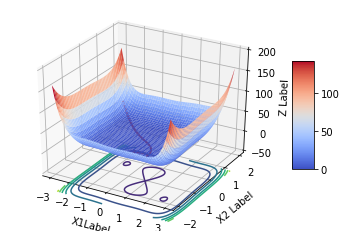

<Figure size 432x288 with 0 Axes>

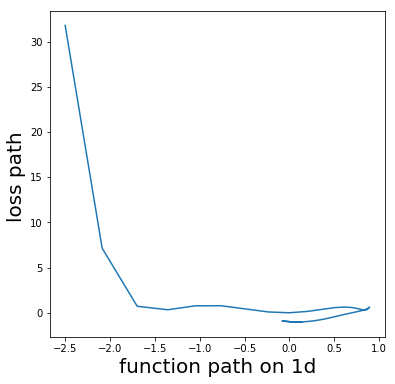

In [0]:
# gradient descent with nesterov & input parameters
solver.nag(x1_init = -2.5, x2_init=1.5, n_iter = 25000,
           eta = 0.08, tol = 1e-15, alpha = .9)
nag_path = solver.x_path
nag_min = solver.x_min.astype(np.double)
nag_loss = solver.loss_path

print('The point which generates the minimum (nag) is: ', nag_min)
print('Number of steps taken to reach global minimum',solver.n_iter)
plot(nag_path)
converge(nag_path,nag_loss)

# Conclusion 

  For the six-hump function, I couldn't find a way to find the global minimum by using both momentum and nesterov. The magnitude of gradient tend to explode with high learning rate(0.03). Therefore, I decided to find an easy **learning rate decay algorithm** and implement it.  

The idea is dropping the learning rate in every n number of steps. I don't have time to implement it properly so this is just an idea of how it can be improved.

Nesterov by looking one step ahead allows us to increase the learning rate but still be able to reach the global minimum for this function.

ref:
https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

**Possible Improvement**



1.   Try different active learning rate algorithm
2.   Try different gradient descent technique

